<a href="https://colab.research.google.com/github/Anpchernova/My_EDA/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D1%83_%D1%81%D0%BE%D1%82%D1%80%D1%83%D0%B4%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Об исследовании**

Чем больше отток кадров в компании, тем выше расходы компании, связанные с поиском новых кадров. При увольнении сотрудника компания вынуждена нести "лишние" расходы, связанные с уходом старого сотрудника и поисками нового. Поэтому в интересах любой компании понять причины высокой "текучки" кадров и их минимизировать, а, следовательно, и сократить "лишние" расходы на подбор персонала.
В рамках данного исследования я постараюсь понять факторы, которые приводят к оттоку сотрудников n-ой компании.

### **Набор данных**
В данном исследовании используется вымышленный набор данных, созданный специалистами IBM по обработке данных. Они были взяты [здесь](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download).
Данный набор данных содержит различную информацию о 1470 сотрудниках (работающих и уволившихся). Я буду использовать этот датасет, чтобы сделать основные выводы о причинах оттока сотрудников.

### **Импорт библиотек и данных**

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.9 MB/s eta 0:00:00


In [3]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
from chart_studio.plotly import iplot
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [4]:
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

In [5]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Вид набора данных: {}".format(df.shape))

Вид набора данных: (1470, 35)


In [6]:
df_copy = df.copy()

### **Обзод данных с последующей визуализацией**

In [7]:
df_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
df_copy.columns.to_series().groupby(df_copy.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df_copy.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


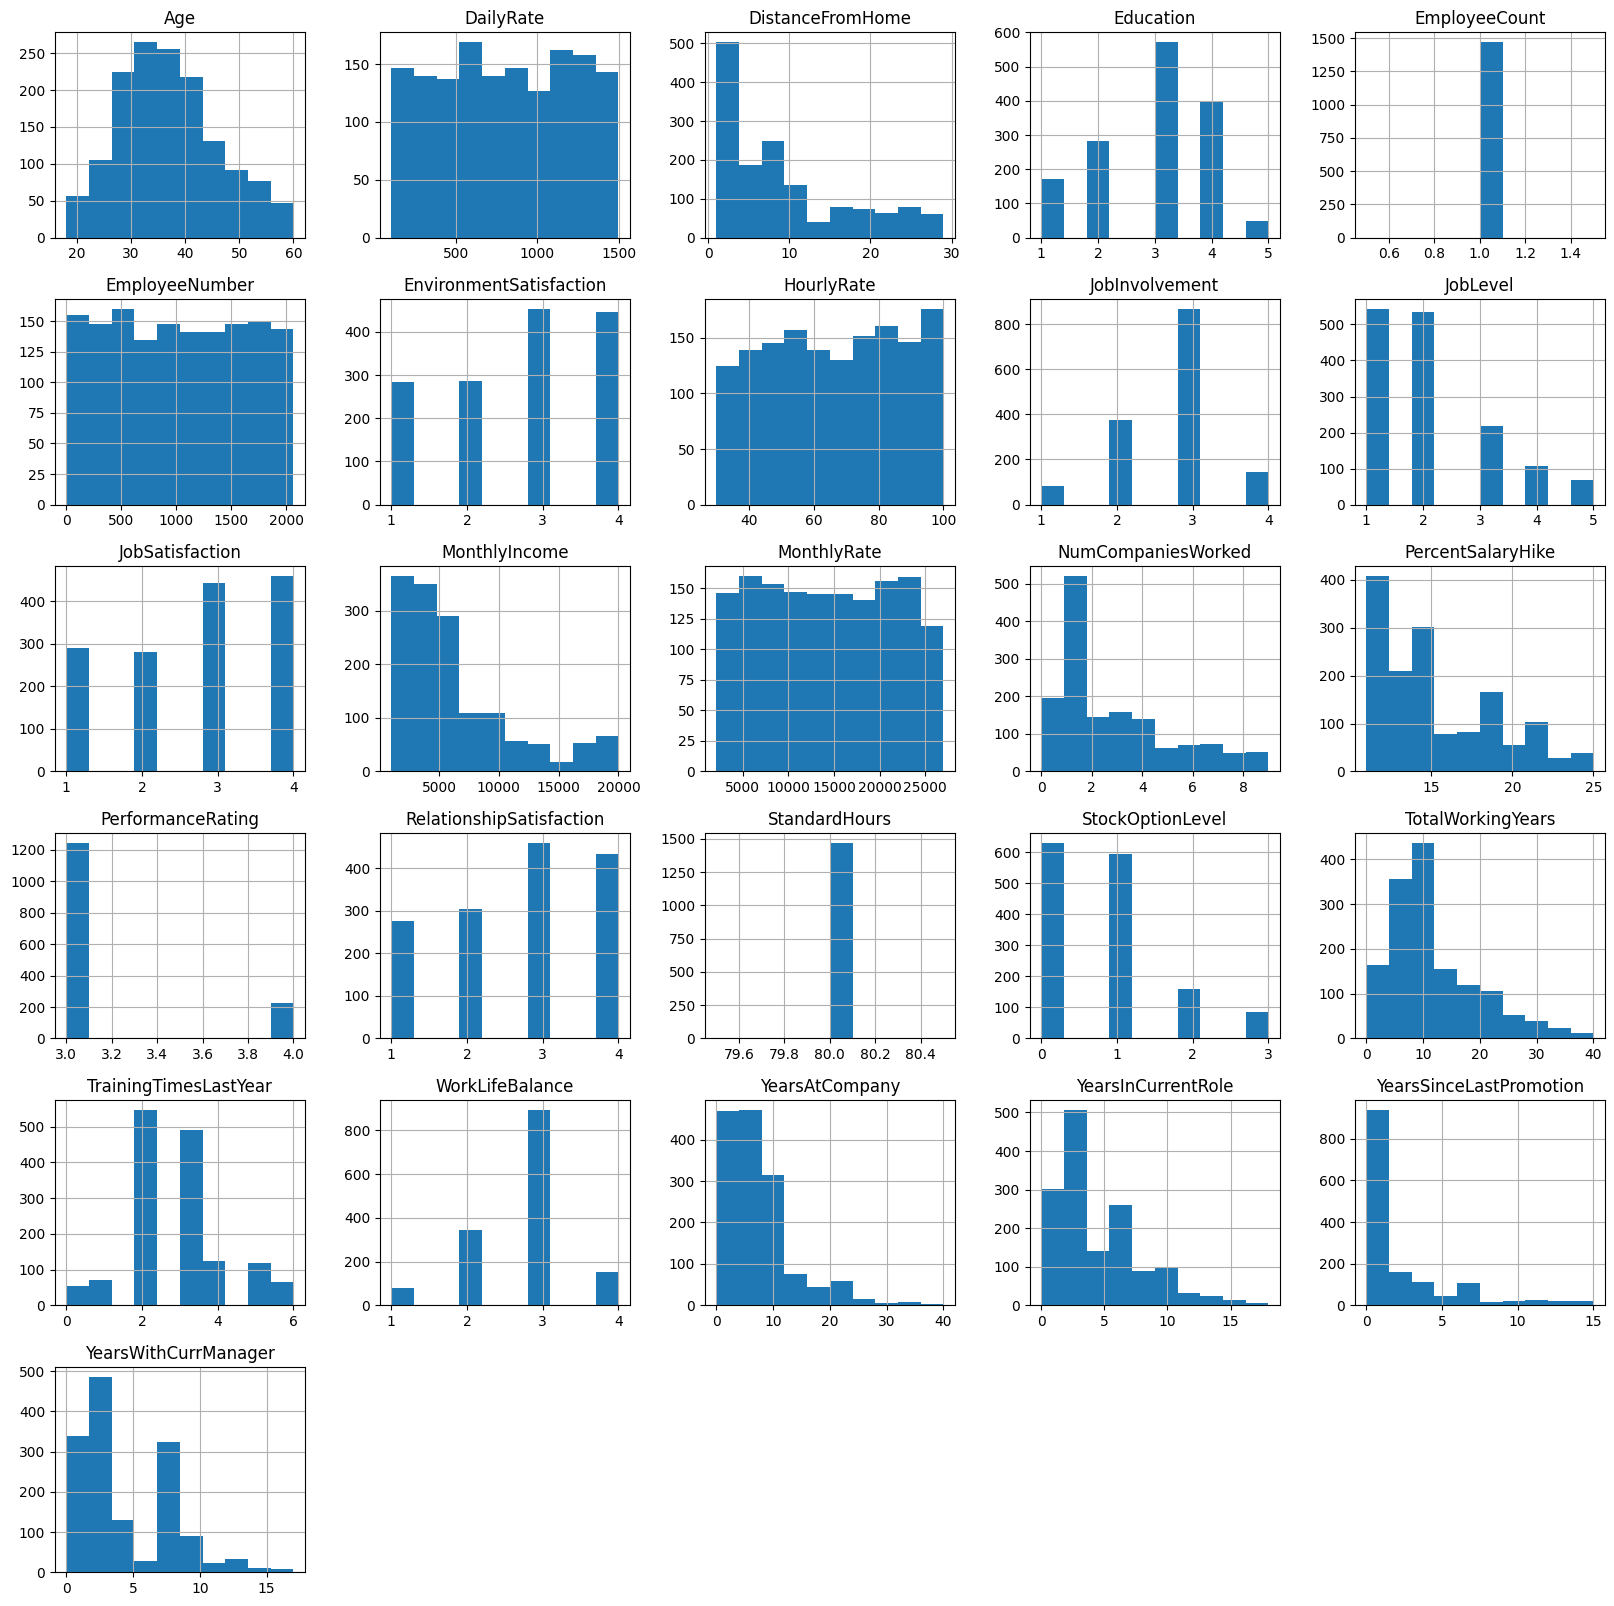

In [12]:
df_copy.hist(figsize=(20,20))
plt.show()

### **Небольшие заметки на основе информации о числовых данных и построенных гистограмм:**
*   Многие гистограммы содержат много "хвостов". Многие распределения имеют правый перекос, например, ежемесячный доход (MonthlyIncome), удаленность от дома (DistanceFromHome), годы работы в компании (YearsAtCompany).
*   Распределение по возрасту представляет собой нормальное распределение с небольшим перекосом вправо, при этом основная часть персонала находится в возрасте от 25 до 45 лет.


*   Количество сотрудников (EmployeeCount) и нормативные часы (StandardHours) являются постоянными значениями для всех сотрудников. Скорее всего, это избыточные параметры.
*   Номер сотрудника (Employee Number), скорее всего, будет уникальным идентификатором для сотрудников, учитывая особенности квазиоднородного распределения.







## **Распределение сотрудников по целевому атрибуту**

### **Возраст**

In [13]:
(mu, sigma) = norm.fit(df_copy.loc[df_copy['Attrition'] == 'Yes', 'Age'])
print(
    'Бывшие сотрудники: средний возраст = {:.1f} лет, а стандартное отклонение = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_copy.loc[df_copy['Attrition'] == 'No', 'Age'])
print('Действующие сотрудники: средний возраст = {:.1f} лет, а стандартное отклонение = {:.1f}'.format(
    mu, sigma))

Бывшие сотрудники: средний возраст = 33.6 лет, а стандартное отклонение = 9.7
Действующие сотрудники: средний возраст = 37.6 лет, а стандартное отклонение = 8.9


**Вывод по критерию "Возраст" (Age):**

Распределение по возрасту действующих и бывших сотрудников отличается всего на один год.
Средний возраст бывших сотрудников составляет 33,6 года, в то время как 37,6 - это средний возраст нынешних сотрудников.

### **Образование**

In [14]:
df_copy['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [15]:
df_EducationField = pd.DataFrame(columns=["Область образования", "% из уволившихся"])
i=0
for field in list(df_copy['EducationField'].unique()):
    ratio = df_copy[(df_copy['EducationField']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    print("В {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_EF = df_EducationField.groupby(by="Область образования").sum()
#df_EF.iplot(kind='bar',title='Распределение уволившихся по области образования (%)')

В Life Sciences доля бывших сотрудников составляет 14.69%
В Other доля бывших сотрудников составляет 13.41%
В Medical доля бывших сотрудников составляет 13.58%
В Marketing доля бывших сотрудников составляет 22.01%
В Technical Degree доля бывших сотрудников составляет 24.24%
В Human Resources доля бывших сотрудников составляет 25.93%


**Пояснение:**
В наборе данных представлены несколько областей образования, а именно: HR, Life Sciences (Естественные науки), Marketing (Маркетинг), Medical (Медицина), Technical Degree (Техническое образование) и другие категории. Здесь я показываю нормализованный процент выпускников для каждой области образования.
P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

### **Пол**

In [16]:
df_copy['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [17]:
print("Нормализованное распределение бывших сотрудников по половому признаку в наборе данных: Мужчин = {:.1f}%; Женщин {:.1f}%.".format((df_copy[(df_copy['Attrition'] == 'Yes') & (
    df_copy['Gender'] == 'Male')].shape[0] / df_copy[df_copy['Gender'] == 'Male'].shape[0])*100, (df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['Gender'] == 'Female')].shape[0] / df_copy[df_copy['Gender'] == 'Female'].shape[0])*100))

Нормализованное распределение бывших сотрудников по половому признаку в наборе данных: Мужчин = 17.0%; Женщин 14.8%.


In [18]:
df_Gender = pd.DataFrame(columns=["Пол", "% из уволившихся"])
i=0
for field in list(df_copy['Gender'].unique()):
    ratio = df_copy[(df_copy['Gender']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    print("Среди {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_G = df_Gender.groupby(by="Пол").sum()
#df_G.iplot(kind='bar',title='Распределение уволившихся по половому признаку (%)')

Среди Female доля бывших сотрудников составляет 14.80%
Среди Male доля бывших сотрудников составляет 17.01%


**Вывод:**
Распределение по половому признаку показывает, что в наборе данных относительная доля бывших сотрудников-мужчин выше, чем бывших сотрудников-женщин, при этом нормализованное гендерное распределение бывших сотрудников в наборе данных составляет 17,0% для мужчин и 14,8% для женщин.

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.


### **Семейное положение**

In [19]:
df_copy['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [20]:
df_Marital = pd.DataFrame(columns=["Семейное положение", "% из уволившихся"])
i=0
for field in list(df_copy['MaritalStatus'].unique()):
    ratio = df_copy[(df_copy['MaritalStatus']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    print("Среди {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_MF = df_Marital.groupby(by="Семейное положение").sum()
#df_MF.iplot(kind='bar',title='Распределение уволившихся по семейному положению (%)')

Среди Single доля бывших сотрудников составляет 25.53%
Среди Married доля бывших сотрудников составляет 12.48%
Среди Divorced доля бывших сотрудников составляет 10.09%


**Вывод:**

В наборе данных представлены три семейных статуса: Женат (Married) (673 сотрудника), Холост (Single) (470 сотрудников), Разведен (Divorced) (327 сотрудников).
Среди уволившихся наибольшая доля одиноких сотрудников - 25%.

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

### **Удаленность от дома**

In [21]:
print("Расстояние от дома до работы для сотрудников составляет от {} до {} километров.".format(round(df_copy['DistanceFromHome'].min() * 1.609344),
                                                                                       round(df_copy['DistanceFromHome'].max() * 1.609344)))

Расстояние от дома до работы для сотрудников составляет от 2 до 47 километров.


In [22]:
print('Среднее расстояние от дома до работы для текущих сотрудников: {:.1f} километров, а для уволившихся сотрудников: {:.1f} километров.'.format(
    df_copy[df_copy['Attrition'] == 'No']['DistanceFromHome'].mean() * 1.609344, df_copy[df_copy['Attrition'] == 'Yes']['DistanceFromHome'].mean() * 1.609344))

Среднее расстояние от дома до работы для текущих сотрудников: 14.3 километров, а для уволившихся сотрудников: 17.1 километров.


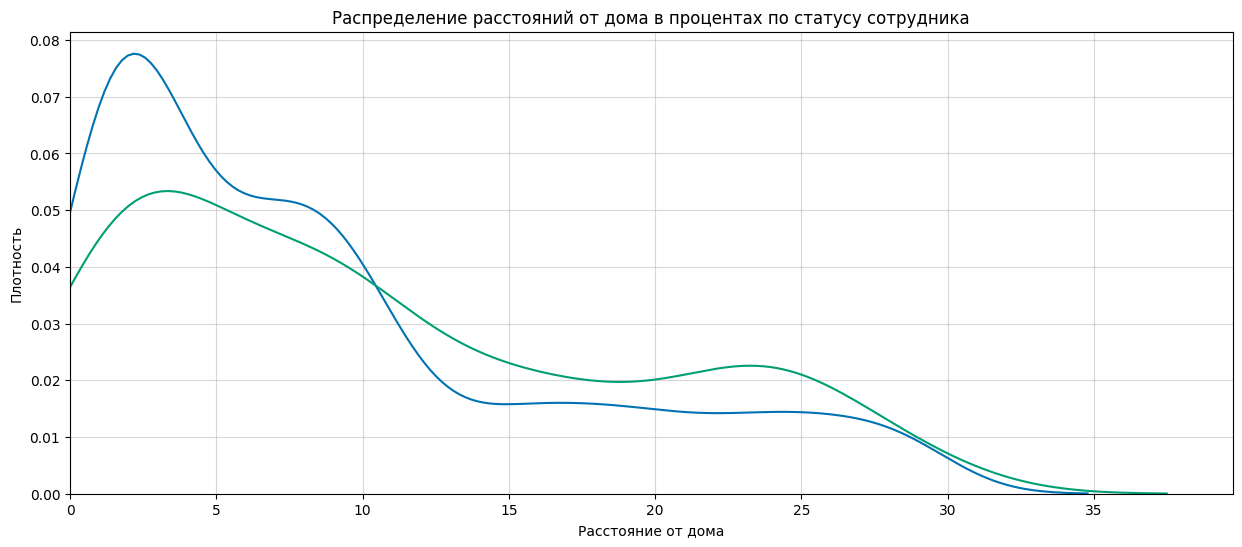

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'DistanceFromHome'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Уволившиеся сотрудники')
plt.xlabel('Расстояние от дома')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение расстояний от дома в процентах по статусу сотрудника');

**Вывод:**

Расстояние от дома до работы среди сотрудников варьируется от 2 до 47 километров. Согласно приведенному выше графику KDE, заметной сильной корреляции между расстоянием от дома и текущим статусом сотрудника (текущий или уволившийся) - нет.


### **Департамент**

In [24]:
df_copy['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [25]:
df_Department = pd.DataFrame(columns=["Департамент", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['Department'].unique()):
    ratio = df_copy[(df_copy['Department']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    print("В {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_DF = df_Department.groupby(by="Департамент").sum()
#df_DF.iplot(kind='bar',title='Распределение уволившихся по департаментам (%)')

В Sales доля бывших сотрудников составляет 20.63%
В Research & Development доля бывших сотрудников составляет 13.84%
В Human Resources доля бывших сотрудников составляет 19.05%


**Пояснение:**

Эти данные содержат информацию о сотрудниках из трех департаментов: Исследования и Разработки (Research & Development), Продаж (Sales) и Отдела кадров (HR - Human Resources).

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

### **Должность и условия работы**

In [26]:
#Сотрудники по разному относятся к командировкам в зависимости от их ролей и уровня в организации.
df_copy['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [27]:
df_BusinessTravel = pd.DataFrame(columns=["Командировки", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['BusinessTravel'].unique()):
    ratio = df_copy[(df_copy['BusinessTravel']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    print("Среди {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_BT = df_BusinessTravel.groupby(by="Командировки").sum()
#df_BT.iplot(kind='bar',title='Распределение уволившихся по количеству командировок (%)')

Среди Travel_Rarely доля бывших сотрудников составляет 14.96%
Среди Travel_Frequently доля бывших сотрудников составляет 24.91%
Среди Non-Travel доля бывших сотрудников составляет 8.00%


**Вывод:**

Предварительный анализ взаимосвязи между частотой командировок и статусом сотрудника в компании показывает, что наибольшая нормализованная доля уволившихся приходится на сотрудников, которые путешествуют "часто" (Travel_Frequently).

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

In [28]:
df_copy['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [29]:
df_JobRole = pd.DataFrame(columns=["Должность", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['JobRole'].unique()):
    ratio = df_copy[(df_copy['JobRole']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    print("Среди {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_JR = df_JobRole.groupby(by="Должность").sum()
#df_JR.iplot(kind='bar',title='Распределение уволившихся по должностям (%)')

Среди Sales Executive доля бывших сотрудников составляет 17.48%
Среди Research Scientist доля бывших сотрудников составляет 16.10%
Среди Laboratory Technician доля бывших сотрудников составляет 23.94%
Среди Manufacturing Director доля бывших сотрудников составляет 6.90%
Среди Healthcare Representative доля бывших сотрудников составляет 6.87%
Среди Manager доля бывших сотрудников составляет 4.90%
Среди Sales Representative доля бывших сотрудников составляет 39.76%
Среди Research Director доля бывших сотрудников составляет 2.50%
Среди Human Resources доля бывших сотрудников составляет 23.08%


**Вывод:**
Наибольшая нормализованная доля уволившихся среди Торговых представителей (Sales Representative), что коррелируется с наибольшим оттоком из Отдела продаж выше.

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

In [30]:
df_copy['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [31]:
df_JobLevel = pd.DataFrame(columns=["Грейд", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['JobLevel'].unique()):
    ratio = df_copy[(df_copy['JobLevel']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    print("Среди {} уровня доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_JL = df_JobLevel.groupby(by="Грейд").sum()
#df_JL.iplot(kind='bar',title='Распределение уволившихся по грейдам (%)')

Среди 2 уровня доля бывших сотрудников составляет 9.74%
Среди 1 уровня доля бывших сотрудников составляет 26.34%
Среди 3 уровня доля бывших сотрудников составляет 14.68%
Среди 4 уровня доля бывших сотрудников составляет 4.72%
Среди 5 уровня доля бывших сотрудников составляет 7.25%


**Вывод:**

Сотрудникам присваивается грейд в организации, который варьируется от 1 (персонал) до 5 (топ-менеджер). Сотрудники с грейдом "1" демонстрируют наибольшую нормализованную долю уволившихся сотрудников.

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

In [32]:
df_copy['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [33]:
df_JobInvolvement = pd.DataFrame(columns=["Вовлеченность", "% среди уволившихся сотрудников"])
i=0
for field in list(df_copy['JobInvolvement'].unique()):
    ratio = df_copy[(df_copy['JobInvolvement']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    print("Среди сотрудников с оценкой {} доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_JI = df_JobInvolvement.groupby(by="Вовлеченность").sum()
#df_JI.iplot(kind='bar',title='Распределение уволившихся по оценка вовлеченности (%)')

Среди сотрудников с оценкой 3 доля бывших сотрудников составляет 14.40%
Среди сотрудников с оценкой 2 доля бывших сотрудников составляет 18.93%
Среди сотрудников с оценкой 4 доля бывших сотрудников составляет 9.03%
Среди сотрудников с оценкой 1 доля бывших сотрудников составляет 33.73%


**Вывод:**

Полученные значения выше показывают отрицательную корреляцию с вовлеченностью сотрудника в работу и текущим статусом сотрудника. Другими словами, сотрудники с более высокой вовлеченностью в работу с меньшей вероятностью уйдут.

P.S. Гистрограмму Colab не хочет строить, поэтому закомментила её.

In [34]:
print("Количество обучений на одного сотрудника в прошлом году варьируется от {} до {}.".format(
    df_copy['TrainingTimesLastYear'].min(), df_copy['TrainingTimesLastYear'].max()))

Количество обучений на одного сотрудника в прошлом году варьируется от 0 до 6.


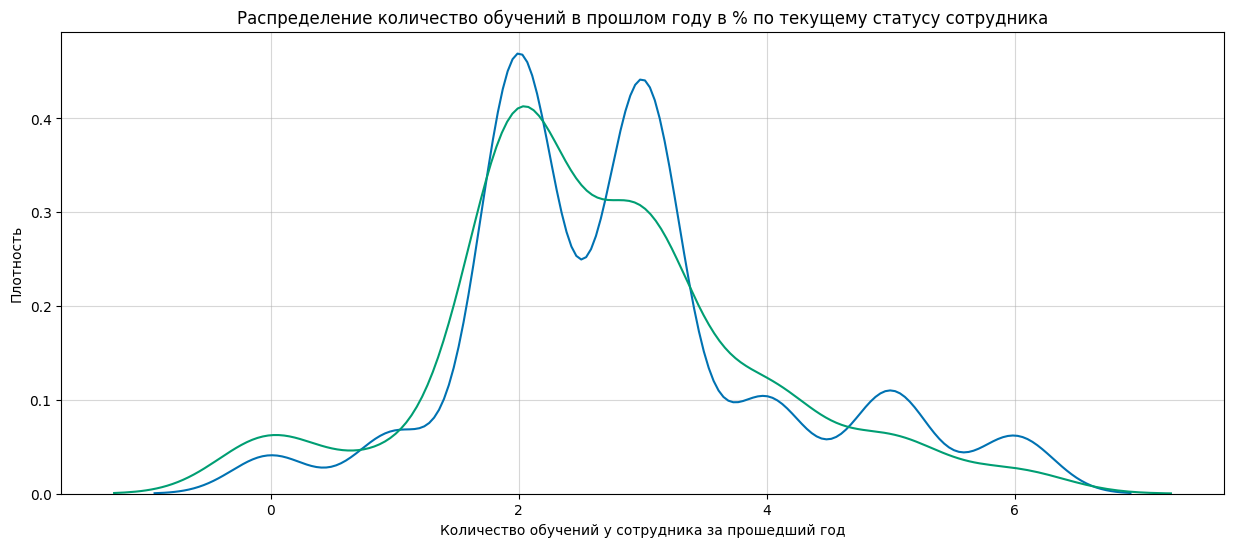

In [35]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Уволившиеся сотрудники')
plt.xlabel('Количество обучений у сотрудника за прошедший год')
plt.ylabel('Плотность')
plt.title('Распределение количество обучений в прошлом году в % по текущему статусу сотрудника');

**Вывод:**

Согласно приведенному выше графику KDE, заметной сильной корреляции между количеством обучений за последний год и статусом сотрудника (текущий или уволившийся) - нет.

In [36]:
df_copy['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [37]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Количество предыдущих компаний сотрудника", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['NumCompaniesWorked'].unique()):
    ratio = df_copy[(df_copy['NumCompaniesWorked']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    print("Среди сотрудников, которые работали до этой компании в {} компаниях, доля от бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_NC = df_NumCompaniesWorked.groupby(by="Количество предыдущих компаний сотрудника").sum()
#df_NC.iplot(kind='bar',title='Распределение уволившихся по количеству предыдущих компаний (%)')

Среди сотрудников, которые работали до этой компании в 8 компаниях, доля от бывших сотрудников составляет 12.24%
Среди сотрудников, которые работали до этой компании в 1 компаниях, доля от бывших сотрудников составляет 18.81%
Среди сотрудников, которые работали до этой компании в 6 компаниях, доля от бывших сотрудников составляет 22.86%
Среди сотрудников, которые работали до этой компании в 9 компаниях, доля от бывших сотрудников составляет 23.08%
Среди сотрудников, которые работали до этой компании в 0 компаниях, доля от бывших сотрудников составляет 11.68%
Среди сотрудников, которые работали до этой компании в 4 компаниях, доля от бывших сотрудников составляет 12.23%
Среди сотрудников, которые работали до этой компании в 5 компаниях, доля от бывших сотрудников составляет 25.40%
Среди сотрудников, которые работали до этой компании в 2 компаниях, доля от бывших сотрудников составляет 10.96%
Среди сотрудников, которые работали до этой компании в 7 компаниях, доля от бывших сотрудников с

**Вывод:**
Прослеживается тенденция, что сотрудники, которые до текущей компании работали в 5 и более разных компаниях, больше всего увольняются в короткой перспективе.

### **Продолжительность работы в текущей компании**

In [38]:
print("Продолжительность работы сотрудника текущей компании варьируется от {} до {} лет.".format(
    df_copy['YearsAtCompany'].min(), df_copy['YearsAtCompany'].max()))

Продолжительность работы сотрудника текущей компании варьируется от 0 до 40 лет.


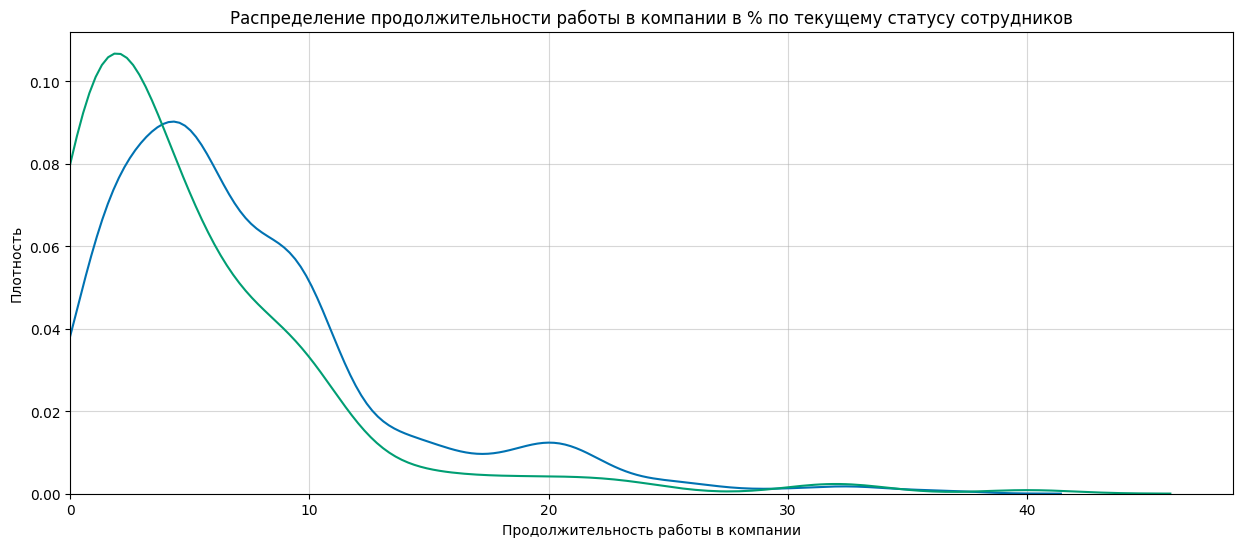

In [39]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'YearsAtCompany'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Уволившиеся сотрудники')
plt.xlabel('Продолжительность работы в компании')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение продолжительности работы в компании в % по текущему статусу сотрудников');

In [40]:
print("Продолжительность работы сотрудника компании в текущей должности варьируется от {} до {} лет.".format(
    df_copy['YearsInCurrentRole'].min(), df_copy['YearsInCurrentRole'].max()))

Продолжительность работы сотрудника компании в текущей должности варьируется от 0 до 18 лет.


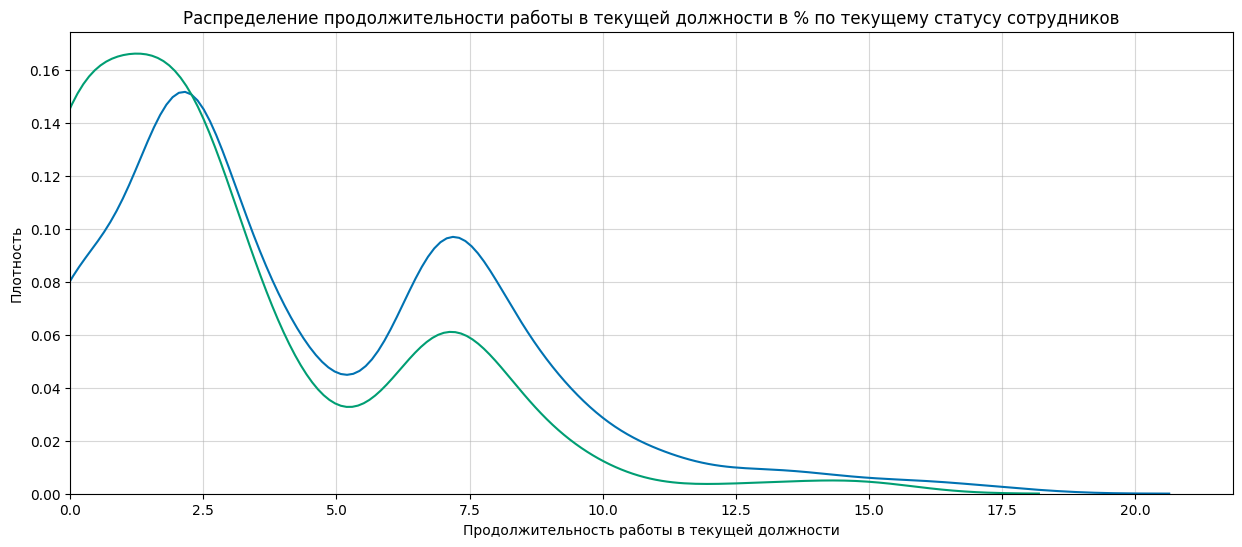

In [41]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Уволившиеся сотрудники')
plt.xlabel('Продолжительность работы в текущей должности')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение продолжительности работы в текущей должности в % по текущему статусу сотрудников');

In [42]:
print("Продолжительность работы сотрудника компании с последнего повышения варьируется от {} до {} лет.".format(
    df_copy['YearsSinceLastPromotion'].min(), df_copy['YearsSinceLastPromotion'].max()))

Продолжительность работы сотрудника компании с последнего повышения варьируется от 0 до 15 лет.


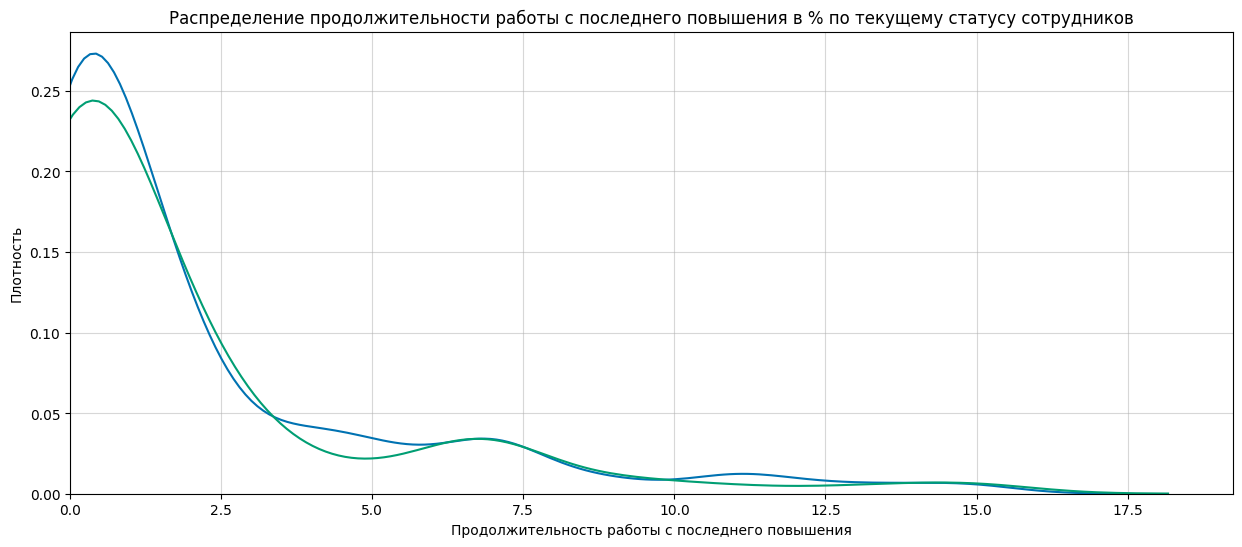

In [43]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Уволившиеся сотрудники')
plt.xlabel('Продолжительность работы с последнего повышения')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение продолжительности работы с последнего повышения в % по текущему статусу сотрудников');

In [44]:
print("Общий трудовой стаж сотрудника варьируется от {} до {} лет.".format(
    df_copy['TotalWorkingYears'].min(), df_copy['TotalWorkingYears'].max()))

Общий трудовой стаж сотрудника варьируется от 0 до 40 лет.


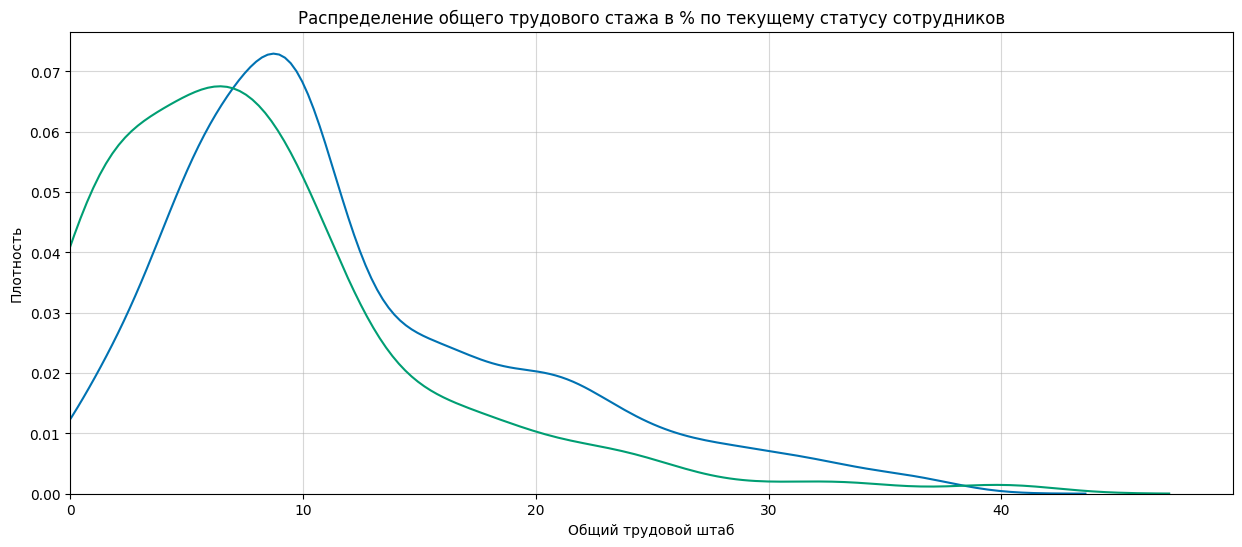

In [45]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Уволившиеся сотрудники')
plt.xlabel('Общий трудовой штаб')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение общего трудового стажа в % по текущему статусу сотрудников');

### **Продолжительность работы с текущим руководителем**

In [46]:
print("Продолжительность работы сотрудника с текущим руководителем варьируется от {} до {} лет.".format(
    df_copy['YearsWithCurrManager'].min(), df_copy['YearsWithCurrManager'].max()))

Продолжительность работы сотрудника с текущим руководителем варьируется от 0 до 17 лет.


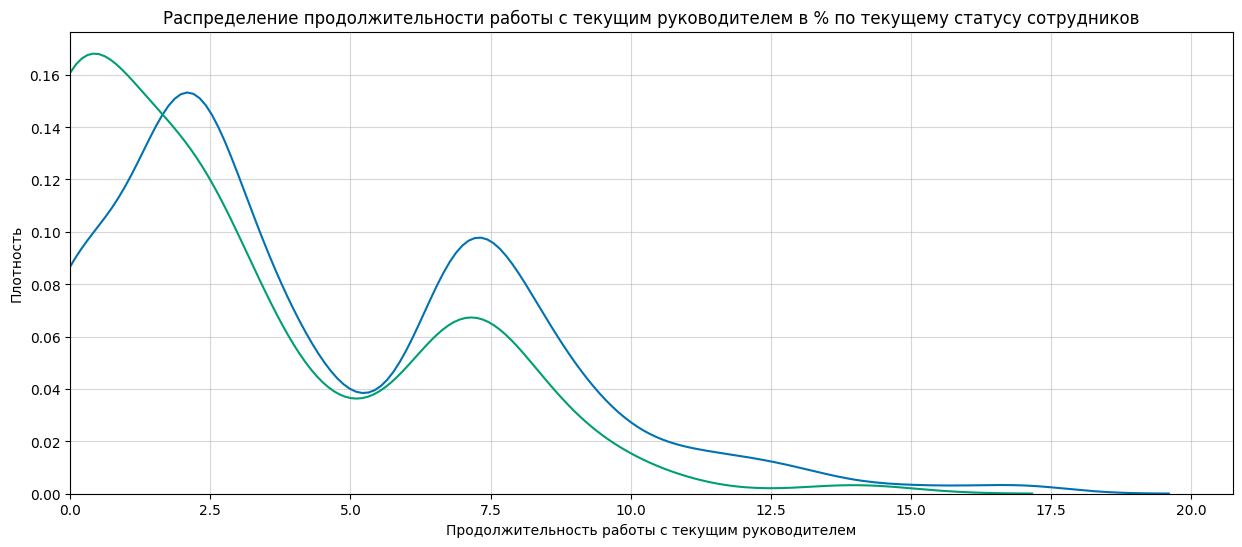

In [47]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Уволившиеся сотрудники')
plt.xlabel('Продолжительность работы с текущим руководителем')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение продолжительности работы с текущим руководителем в % по текущему статусу сотрудников');

### **Оценка баланса работы и личной жизни**

In [48]:
df_copy['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [49]:
df_WorkLifeBalance = pd.DataFrame(columns=["Баланс работы и личной жизни", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['WorkLifeBalance'].unique()):
    ratio = df_copy[(df_copy['WorkLifeBalance']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    print("Среди сотрудников с оценкой {} баланса между работой и личной жизнью доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_WLB = df_WorkLifeBalance.groupby(by="Баланс работы и личной жизни").sum()
#df_WLB.iplot(kind='bar',title='Распределение уволившихся по оценка баланса работы и личной жизни (%)')

Среди сотрудников с оценкой 1 баланса между работой и личной жизнью доля бывших сотрудников составляет 31.25%
Среди сотрудников с оценкой 3 баланса между работой и личной жизнью доля бывших сотрудников составляет 14.22%
Среди сотрудников с оценкой 2 баланса между работой и личной жизнью доля бывших сотрудников составляет 16.86%
Среди сотрудников с оценкой 4 баланса между работой и личной жизнью доля бывших сотрудников составляет 17.65%


**Вывод:**

Данные показывают, что у наибольшей нормализованной доли уволившихся сотрудников был "Плохой" (оценка - 1) баланс между работой и личной жизнью.


In [50]:
df_copy['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

**Вывод:**

Все сотрудники имеют стандартную 80-часовую рабочую нагрузку.

In [51]:
df_copy['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [52]:
df_OverTime = pd.DataFrame(columns=["Переработки", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['OverTime'].unique()):
    ratio = df_copy[(df_copy['OverTime']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, кто ответил {} касательно наличия переработок, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_OT = df_OverTime.groupby(by="Переработки").sum()
#df_OT.iplot(kind='bar',title='Распределение уволившихся по наличию переработок (%)')

Среди тех, кто ответил Yes касательно наличия переработок, доля бывших сотрудников составляет 30.53%
Среди тех, кто ответил No касательно наличия переработок, доля бывших сотрудников составляет 10.44%


**Вывод:**

У некоторых сотрудников есть обязательства по сверхурочным работам. Данные ясно показывают, что значительно большая часть сотрудников с переработками уволилась из компании.

### **Заработная плата сотрудников**

In [53]:
print("Почасовая ставка сотрудника варьируется от ${} до ${}.".format(
    df_copy['HourlyRate'].min(), df_copy['HourlyRate'].max()))

Почасовая ставка сотрудника варьируется от $30 до $100.


In [54]:
print("Дневная ставка сотрудника варьируется от ${} до ${}.".format(
    df_copy['DailyRate'].min(), df_copy['DailyRate'].max()))

Дневная ставка сотрудника варьируется от $102 до $1499.


In [55]:
print("Месячная ставка сотрудника варьируется от ${} до ${}.".format(
    df_copy['MonthlyRate'].min(), df_copy['MonthlyRate'].max()))

Месячная ставка сотрудника варьируется от $2094 до $26999.


In [56]:
print("Ежемесячный доход сотрудника варьируется от ${} до ${}.".format(
    df_copy['MonthlyIncome'].min(), df_copy['MonthlyIncome'].max()))

Ежемесячный доход сотрудника варьируется от $1009 до $19999.


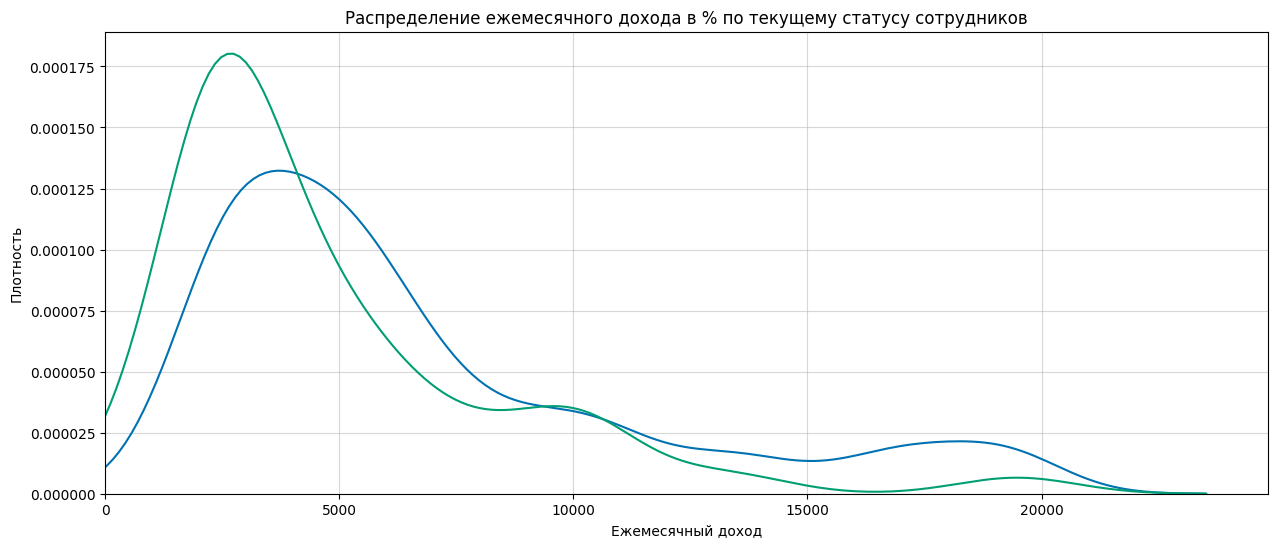

In [57]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'MonthlyIncome'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Уволившиеся сотрудники')
plt.xlabel('Ежемесячный доход')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение ежемесячного дохода в % по текущему статусу сотрудников');

In [58]:
print("Процент повышения заработной платы варьируется от {}% до {}%.".format(
    df_copy['PercentSalaryHike'].min(), df_copy['PercentSalaryHike'].max()))

Процент повышения заработной платы варьируется от 11% до 25%.


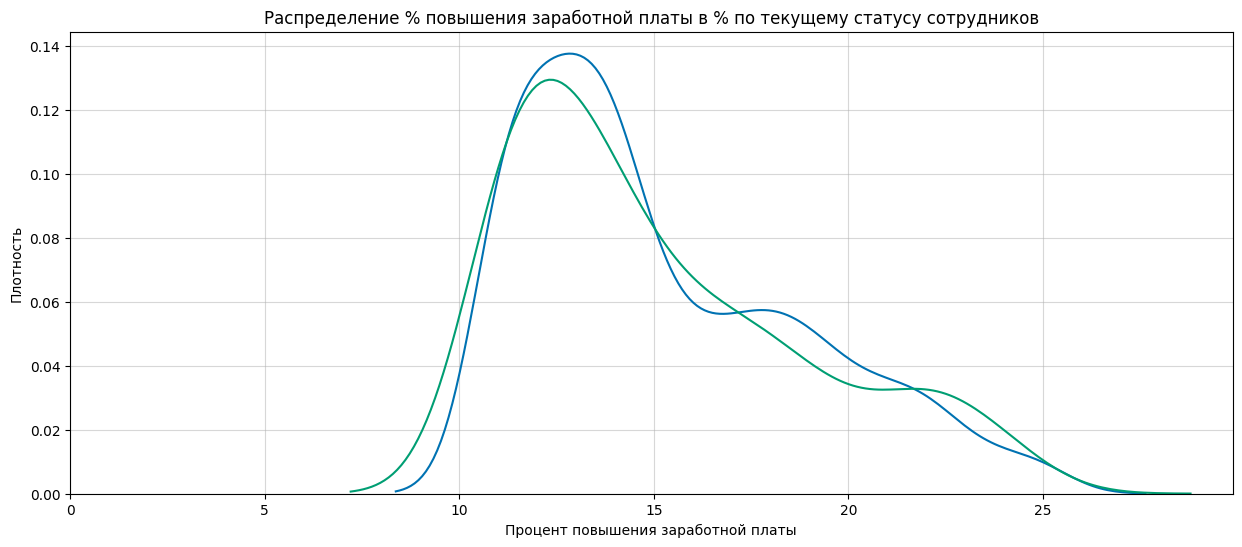

In [59]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Текущие сотрудники')
sns.kdeplot(df_copy.loc[df_copy['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Уволившиеся сотрудники')
plt.xlabel('Процент повышения заработной платы')
plt.xlim(left=0)
plt.ylabel('Плотность')
plt.title('Распределение % повышения заработной платы в % по текущему статусу сотрудников');

In [60]:
print("Количество опционов на акции варьируется от {} до {}.".format(
    df_copy['StockOptionLevel'].min(), df_copy['StockOptionLevel'].max()))

Количество опционов на акции варьируется от 0 до 3.


In [61]:
print("Нормализованный процент уволившихся сотрудников в зависимости от уровня опционов на акции составляет: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['StockOptionLevel'] == 1)
          ].shape[0] / df_copy[df_copy['StockOptionLevel'] == 1].shape[0]*100,
    df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['StockOptionLevel'] == 2)
          ].shape[0] / df_copy[df_copy['StockOptionLevel'] == 1].shape[0]*100,
    df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['StockOptionLevel'] == 3)].shape[0] / df_copy[df_copy['StockOptionLevel'] == 1].shape[0]*100))

Нормализованный процент уволившихся сотрудников в зависимости от уровня опционов на акции составляет: 1: 9.40%, 2: 2.01%, 3: 2.52%


In [62]:
df_StockOptionLevel = pd.DataFrame(columns=["Количество опционов на акции", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['StockOptionLevel'].unique()):
    ratio = df_copy[(df_copy['StockOptionLevel']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, кто имеет {} количество опционов на акции, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_SOL = df_StockOptionLevel.groupby(by="Количество опционов на акции").sum()
#df_SOL.iplot(kind='bar',title='Распределение уволившихся по количеству опционов на акции (%)')

Среди тех, кто имеет 0 количество опционов на акции, доля бывших сотрудников составляет 24.41%
Среди тех, кто имеет 1 количество опционов на акции, доля бывших сотрудников составляет 9.40%
Среди тех, кто имеет 3 количество опционов на акции, доля бывших сотрудников составляет 17.65%
Среди тех, кто имеет 2 количество опционов на акции, доля бывших сотрудников составляет 7.59%


### **Удовлетворенность сотрудников и результаты их деятельности**

In [63]:
df_copy['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [64]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["Удовлетворенность окружающей средой", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['EnvironmentSatisfaction'].unique()):
    ratio = df_copy[(df_copy['EnvironmentSatisfaction']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, кто поставил оценку {} касательно удовлетвореннсти окружающей средой, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_Env = df_EnvironmentSatisfaction.groupby(by="Удовлетворенность окружающей средой").sum()
#df_Env.iplot(kind='bar',title='Распределение уволившихся по степени удовлетворенности окружающей средой (%)')

Среди тех, кто поставил оценку 2 касательно удовлетвореннсти окружающей средой, доля бывших сотрудников составляет 14.98%
Среди тех, кто поставил оценку 3 касательно удовлетвореннсти окружающей средой, доля бывших сотрудников составляет 13.69%
Среди тех, кто поставил оценку 4 касательно удовлетвореннсти окружающей средой, доля бывших сотрудников составляет 13.45%
Среди тех, кто поставил оценку 1 касательно удовлетвореннсти окружающей средой, доля бывших сотрудников составляет 25.35%


**Вывод:**
Доля уволившихся сотрудников уменьшается по мере увеличения показателя удовлетворенности окружающей средой.

In [65]:
df_copy['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [66]:
df_JobSatisfaction = pd.DataFrame(columns=["Удовлетворенность от работы", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['JobSatisfaction'].unique()):
    ratio = df_copy[(df_copy['JobSatisfaction']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, кто поставил оценку {} касательно удовлетвореннсти от работы, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_JS = df_JobSatisfaction.groupby(by="Удовлетворенность от работы").sum()
#df_JS.iplot(kind='bar',title='Распределение уволившихся по степени удовлетворенности от работы (%)')

Среди тех, кто поставил оценку 4 касательно удовлетвореннсти от работы, доля бывших сотрудников составляет 11.33%
Среди тех, кто поставил оценку 2 касательно удовлетвореннсти от работы, доля бывших сотрудников составляет 16.43%
Среди тех, кто поставил оценку 3 касательно удовлетвореннсти от работы, доля бывших сотрудников составляет 16.52%
Среди тех, кто поставил оценку 1 касательно удовлетвореннсти от работы, доля бывших сотрудников составляет 22.84%


**Вывод:**

Доля уволившихся сотрудников уменьшается по мере увеличения показателя удовлетворенности от работы.

In [67]:
df_copy['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [68]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["Удовлетворенность отношениями в коллективе", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['RelationshipSatisfaction'].unique()):
    ratio = df_copy[(df_copy['RelationshipSatisfaction']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, кто поставил оценку {} касательно удовлетвореннсти отношениями в коллективе, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_RS = df_RelationshipSatisfaction.groupby(by="Удовлетворенность отношениями в коллективе").sum()
#df_RS.iplot(kind='bar',title='Распределение уволившихся по степени удовлетворенности отношениями в коллективе (%)')

Среди тех, кто поставил оценку 1 касательно удовлетвореннсти отношениями в коллективе, доля бывших сотрудников составляет 20.65%
Среди тех, кто поставил оценку 4 касательно удовлетвореннсти отношениями в коллективе, доля бывших сотрудников составляет 14.81%
Среди тех, кто поставил оценку 2 касательно удовлетвореннсти отношениями в коллективе, доля бывших сотрудников составляет 14.85%
Среди тех, кто поставил оценку 3 касательно удовлетвореннсти отношениями в коллективе, доля бывших сотрудников составляет 15.47%


In [69]:
df_copy['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [70]:
print("Нормализованный процент уволившихся сотрудников в зависимости от уровня эффективности работы: 3: {:.2f}%, 4: {:.2f}%".format(
    df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['PerformanceRating'] == 3)
          ].shape[0] / df_copy[df_copy['PerformanceRating'] == 3].shape[0]*100,
    df_copy[(df_copy['Attrition'] == 'Yes') & (df_copy['PerformanceRating'] == 4)].shape[0] / df_copy[df_copy['PerformanceRating'] == 4].shape[0]*100))

Нормализованный процент уволившихся сотрудников в зависимости от уровня эффективности работы: 3: 16.08%, 4: 16.37%


In [71]:
df_PerformanceRating = pd.DataFrame(columns=["Уровень эффективности работы", "% от уволившихся сотрудников"])
i=0
for field in list(df_copy['PerformanceRating'].unique()):
    ratio = df_copy[(df_copy['PerformanceRating']==field)&(df_copy['Attrition']=="Yes")].shape[0] / df_copy[df_copy['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    print("Среди тех, у кого уровень эффективности работы равен {}, доля бывших сотрудников составляет {:.2f}%".format(field, ratio*100))
df_PR = df_PerformanceRating.groupby(by="Уровень эффективности работы").sum()
#df_PR.iplot(kind='bar',title='Распределение уволившихся по уровню эффективности работы (%)')

Среди тех, у кого уровень эффективности работы равен 3, доля бывших сотрудников составляет 16.08%
Среди тех, у кого уровень эффективности работы равен 4, доля бывших сотрудников составляет 16.37%


## **Выбытие (критерий Attrition)**

"Attrition" указывает, активен ли сотрудник в данный момент ("Нет" = "No") или покинул компанию ("Да" = "Yes").

In [72]:
df_copy['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [73]:
print("Доля текущих сотрудников составляет {:.1f}%, а доля уволившихся сотрудников - {:.1f}%".format(
    df_copy[df_copy['Attrition'] == 'No'].shape[0] / df_copy.shape[0]*100,
    df_copy[df_copy['Attrition'] == 'Yes'].shape[0] / df_copy.shape[0]*100))

Доля текущих сотрудников составляет 83.9%, а доля уволившихся сотрудников - 16.1%


In [74]:
#df_copy['Attrition'].iplot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

**Вывод:**

Из данных выше, мы видим проблему несбалансированного класса. Доля текущих сотрудников в наборе данных составляет 83,9%, а процент уволившихся сотрудников - 16,1%

Для того, чтобы предсказать значение функции "Выбытие", используя другие связанные функции, которые касаются личной и профессиональной истории сотрудника. Нам необходимо устранить дисбаланс целевых функций между классами.

## **Корреляция**

В данном пункте мы посмотрим на некоторые из наиболее значимых корреляций.

In [75]:
df_HR_trans = df_copy.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_HR_trans = df_HR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


Построим тепловую карту, чтобы визуализировать корреляцию между "Выбытием" и этими факторами.

<Axes: >

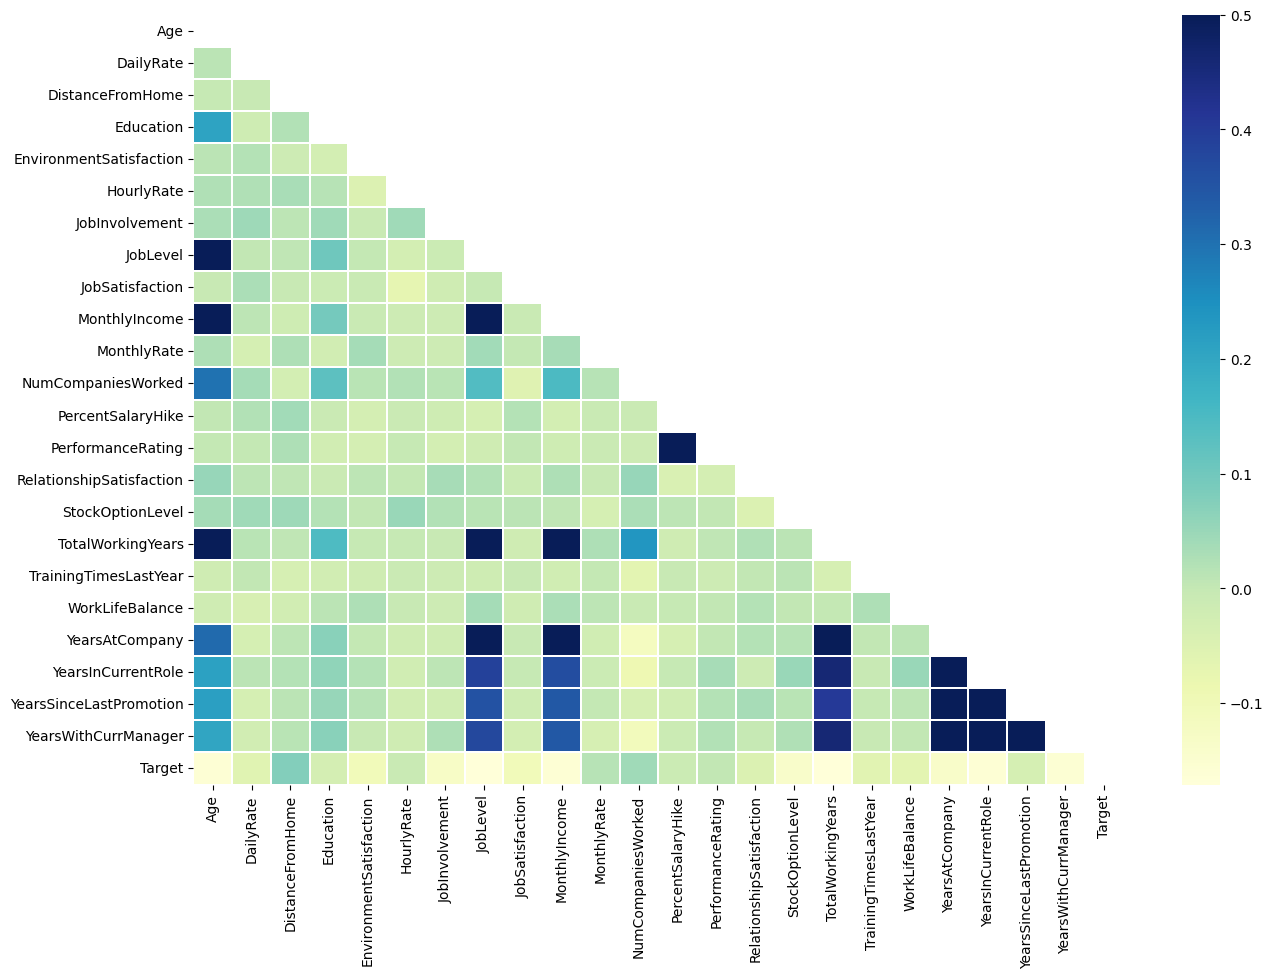

In [76]:
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

**Вывод:**

Как показано на карте выше, "Месячная ставка" (Monthly Rate), "Количество компаний" (Number of Companies Worked) и "Расстояние от дома" (Distance From Home) положительно коррелируют с выбытием персонала.

В то время как "Общий стаж работы" (Total Working Years), "Грейд" (Job Level) и "Продолжительность работы в текущей должности" (Years In Current Role) отрицательно коррелируют с выбытием.

## **Заключительные выводы исследовательского анализа данных**

**Основные результаты данного исследования:**


*   В наборе данных нет пропущенных или ошибочных значений данных, все функции имеют правильный тип данных.
*   Наиболее сильная положительная корреляция с целевой функцией прослеживается с:"Месячная ставка" (Monthly Rate), "Количество компаний" (Number of Companies Worked) и "Расстояние от дома" (Distance From Home).Наиболее сильная отрицательная корреляция прослеживается с: "Общий стаж работы" (Total Working Years), "Грейд" (Job Level) и "Продолжительность работы в текущей должности" (Years In Current Role).
*   Набор данных несбалансирован, поскольку большинство наблюдений описывают текущих сотрудников компании.
*   Несколько функций (т.е. столбцов) являются избыточными для анализа, а именно: Количество сотрудников (Employee Count), Номер (ID) сотрудника (Employee Number), Часы работы (Standard Hours) и Совершеннолетние (Over18).



**Основные наблюдения данного исследования:**


*   Одинокие сотрудники демонстрируют наибольшую долю увольнений по сравнению с женатыми и разведенными коллегами.
*   Около 10% сотрудников уходят, когда их продолжительность работы в компании достигает 2 лет.
*   Лояльные сотрудники с более высокой зарплатой и большим объемом обязанностей демонстрируют меньшую долю увольнений по сравнению со своими бывшими коллегами.
*   Сотрудники, которые живут дальше от своей работы, демонстрируют более высокую долю увольнений по сравнению со своими коллегами.
*   Сотрудники, которые имеют большее число командировок, демонстрируют более высокую долю увольнений по сравнению со своими коллегами.
*   Сотрудники, которым приходится работать сверхурочно, демонстрируют более высокую долю увольнений по сравнению со своими коллегами.
*   Сотрудники, работающие торговыми представителями, составляют наибольшую долю от уволившихся в представленном наборе данных.
*   Сотрудники, которые ранее уже работали в нескольких компаниях (от 5 и более), демонстрируют более высокую долю увольнений по сравнению со своими коллегами.





